In [4]:
import pandas as pd

In [5]:
# Departments
departments = pd.DataFrame({
    "id": [1, 2],
    "name": ["HR", "Engineering"]
})

# Employees
employees = pd.DataFrame({
    "id": [1, 2, 3, 4],
    "name": ["Alice", "Bob", "Charlie", "Dana"],
    "department_id": [1, 2, 2, 1],
    "salary": [60000, 45000, 70000, 50000]
})

# Attrition
attrition = pd.DataFrame({
    "employee_id": [2, 4],
    "exit_date": pd.to_datetime(["2025-06-15", "2025-09-01"]),
    "reason": ["Resigned", "Retired"]
})


In [5]:
employees.groupby("department_id")["id"].count().rename("headcount").reset_index().merge(departments, left_on="department_id", right_on="id")


,department_id,headcount,id,name
0,1,2,1,HR
1,2,2,2,Engineering


In [6]:
employees.groupby("department_id")["salary"].mean().rename("avg_salary").reset_index().merge(departments, left_on="department_id", right_on="id")


,department_id,avg_salary,id,name
0,1,55000.0,1,HR
1,2,57500.0,2,Engineering


In [7]:
# Merge employees with attrition
merged = employees.merge(attrition, left_on="id", right_on="employee_id", how="left")

# Calculate attrition rate
attrition_rate = merged.groupby("department_id").apply(
    lambda g: g["employee_id"].notna().sum() / len(g)
).reset_index(name="attrition_rate")

# Add department names
attrition_rate.merge(departments, left_on="department_id", right_on="id")


C:\Users\hagan\AppData\Local\Temp\ipykernel_14180\1292400198.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  attrition_rate = merged.groupby("department_id").apply(


,department_id,attrition_rate,id,name
0,1,0.5,1,HR
1,2,0.5,2,Engineering


In [8]:
active_employees = employees[~employees["id"].isin(attrition["employee_id"])]
active_employees.merge(departments, left_on="department_id", right_on="id")[["name_x","name_y","salary"]].rename(columns={"name_x":"employee","name_y":"department"})


,employee,department,salary
0,Alice,HR,60000
1,Charlie,Engineering,70000


In [9]:
attrition["month"] = attrition["exit_date"].dt.to_period("M")
attrition.groupby("month")["employee_id"].count().reset_index(name="exits")


,month,exits
0,2025-06,1
1,2025-09,1


In [10]:
# See the first few rows
employees.head()

# Filter rows
employees[employees["salary"] > 50000]

# Group and aggregate
employees.groupby("department_id")["salary"].mean()

# Merge tables
employees.merge(departments, left_on="department_id", right_on="id")


,id_x,name_x,department_id,salary,id_y,name_y
0,1,Alice,1,60000,1,HR
1,2,Bob,2,45000,2,Engineering
2,3,Charlie,2,70000,2,Engineering
3,4,Dana,1,50000,1,HR


In [16]:
import pandas as pd
#df = pd.read_csv("data.csv")   # or use the sample tables we built
#df.head()
#df.info()
#df.describe()

employees.head()
employees.info()
employees.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4 non-null      int64 
 1   name           4 non-null      object
 2   department_id  4 non-null      int64 
 3   salary         4 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 260.0+ bytes


,id,department_id,salary
count,4.000000,4.00000,4.000000
mean,2.500000,1.50000,56250.000000
std,1.290994,0.57735,11086.778913
min,1.000000,1.00000,45000.000000
25%,1.750000,1.00000,48750.000000
50%,2.500000,1.50000,55000.000000
75%,3.250000,2.00000,62500.000000
max,4.000000,2.00000,70000.000000


In [20]:
# Filter employees with salary > 50000
employees[employees["salary"] > 50000]

# Filter employees in HR department
employees[employees["department_id"] == 1]


,id,name,department_id,salary
0,1,Alice,1,60000
3,4,Dana,1,50000


In [23]:
employees.groupby("department_id")["salary"].mean()
employees.groupby("department_id")["id"].count()


department_id
1    2
2    2
Name: id, dtype: int64

In [24]:
employees.merge(departments, left_on="department_id", right_on="id")


,id_x,name_x,department_id,salary,id_y,name_y
0,1,Alice,1,60000,1,HR
1,2,Bob,2,45000,2,Engineering
2,3,Charlie,2,70000,2,Engineering
3,4,Dana,1,50000,1,HR


In [ ]:
merged = employees.merge(attrition, left_on="id", right_on="employee_id", how="left")
merged.groupby("department_id")["employee_id"].apply(lambda x: x.notna().sum())


In [6]:
attrition["month"] = attrition["exit_date"].dt.to_period("M")
attrition.groupby("month")["employee_id"].count()


month
2025-06    1
2025-09    1
Freq: M, Name: employee_id, dtype: int64

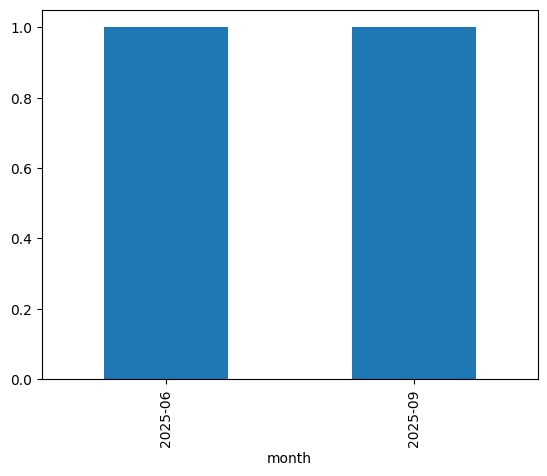

In [7]:
import matplotlib.pyplot as plt
attrition["month"].value_counts().sort_index().plot(kind="bar")
plt.show()


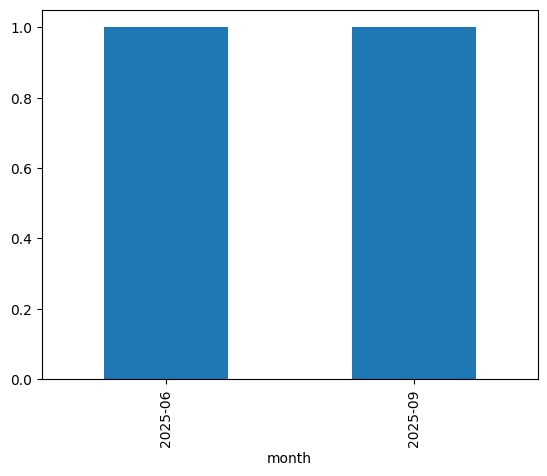

In [8]:
import matplotlib.pyplot as plt

attrition["month"] = attrition["exit_date"].dt.to_period("M")
attrition["month"].value_counts().sort_index().plot(kind="bar")
plt.show()
